# sterio disparity estimation

(288, 384)


(<matplotlib.axes._subplots.AxesSubplot at 0x158683ece88>,
 Text(0.5, 1.0, 'right image'))

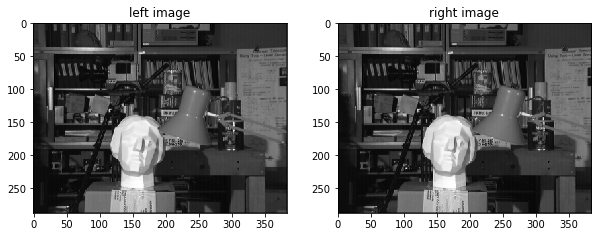

In [70]:
import cv2
import matplotlib.pyplot as plt
imgr=cv2.imread('C:/Users/Ankit/Desktop/computer vison/scene1.row3.col2.ppm',0)
imgl=cv2.imread('C:/Users/Ankit/Desktop/computer vison/scene1.row3.col3.ppm',0)
print(imgl.shape)
figure=plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(imgl,cmap='gray'),plt.title('left image')
plt.subplot(1,2,2),plt.imshow(imgr,cmap='gray'),plt.title('right image')

(<matplotlib.axes._subplots.AxesSubplot at 0x1585a5678c8>,
 Text(0.5, 1.0, 'right image'))

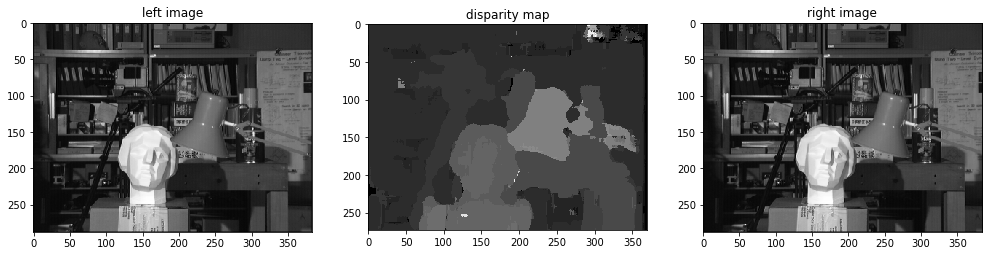

In [78]:
import numpy as np
import math
ws=15
d=30
v=int((ws-1)/2)
#SAD=[]
SSD=[]
#COR=[]
for i in range (v,imgl.shape[0]-v):
    for j in range (v,imgl.shape[1]-v):
        y=imgl[i-v:i+v+1,j-v:j+v+1]
        k=1
        #SADCOST=[]
        SSDCOST=[]
        #CORCOST=[]
        while k>0:
            if (j-v+k)<=(imgl.shape[1]-2*v) and (k<=d):
                z=imgr[i-v:i+v+1,j-v+k-1:j+v+k-1+1]
                k+=1
                p=abs(y-z)
                #SADCOST.append(p.sum())
                SSDCOST.append((np.multiply(p,p)).sum())
                #temp1=np.multiply(y,z)
                #temp2=np.multiply(y,y)
                #temp3=np.multiply(z,z)
                #temp4=temp1.sum()/math.sqrt((temp2.sum())*(temp3.sum()))
                #CORCOST.append(temp4)
                
            else:
                k=0
        #SAD.append(SADCOST.index(min(SADCOST)))
        SSD.append(SSDCOST.index(min(SSDCOST)))
        #COR.append(CORCOST.index(max(CORCOST)))

#SAD=255*(np.array(SAD)/max(SAD))   
SSD=255*(np.array(SSD)/max(SSD) )
#COR=255*(np.array(COR)/max(COR)) 
#SADimg=SAD.reshape(imgl.shape[0]-2*v,imgl.shape[1]-2*v)
SSDimg=SSD.reshape(imgl.shape[0]-2*v,imgl.shape[1]-2*v)
#CORimg=COR.reshape(imgl.shape[0]-2*v,imgl.shape[1]-2*v)




figure=plt.figure(figsize=(17,17))
plt.subplot(1,3,1),plt.imshow(imgl,cmap='gray'),plt.title('left image')
plt.subplot(1,3,2),plt.imshow(SSDimg,cmap='gray'),plt.title('disparity map')
plt.subplot(1,3,3),plt.imshow(imgr,cmap='gray'),plt.title('right image')



        